In [1]:
import numpy as np
import scipy as sp
import random
import inspect
import timeit
import sdeint
from sdeint import SdeInt
import matplotlib.pyplot as plt


In [2]:
# test 1d Euler case
mu = 5
kappa = 2
d = 1

x0 = 1
sigma20 = 0 # initial variance
tspan = np.linspace(0, 10, 1001)

A = lambda x : kappa*( mu-x)
B = lambda x: np.sqrt(d)

Numtrajs=2000
xtrajs=np.zeros((len(tspan), Numtrajs))

start_time = timeit.default_timer()
for ind in range(Numtrajs):
    xtrajs[:, ind]=SdeInt().Euler(A, B, x0, tspan)
elapsed_time = timeit.default_timer() - start_time
print("Elapsed time is {} seconds".format(elapsed_time))

# construct known solution  distribution
# for arbitrary linear 1d SDEs, just get xbar and sigma2
xbar = lambda t : mu+(x0-mu)*np.exp(-kappa*t)
sigma2 = lambda t : sigma20*np.exp(-2*kappa*t) + d*(1-np.exp(-2*kappa*t))/(2*kappa)
P = lambda x, t: np.exp(-(x-xbar(t))**2 / (2*sigma2(t)) )/np.sqrt(2*np.pi*sigma2(t))

Elapsed time is 7.696031080005923 seconds


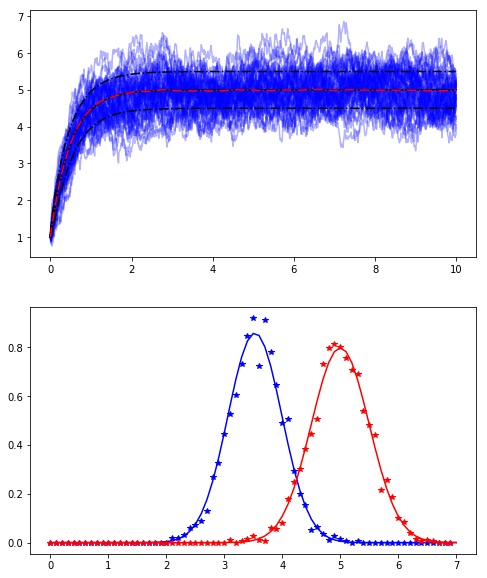

In [3]:
fig_i, ax_i  = plt.subplots(2, 1, figsize=(8,10))
ax_i[0].plot(tspan, xtrajs[:, 0:50], '-b', alpha=0.3)
ax_i[0].plot(tspan,xbar(tspan), '-k')
ax_i[0].plot(tspan[1:-1],xbar(tspan[1:-1])+np.sqrt(sigma2(tspan[1:-1])), '-.k')
ax_i[0].plot(tspan[1:-1],xbar(tspan[1:-1])-np.sqrt(sigma2(tspan[1:-1])), '-.k')
ax_i[0].plot(tspan, np.mean(xtrajs, axis=1), '-.r')

deltabin =0.1
xbinc=np.linspace(0, 7, int(7./deltabin+1))
indplot1 = -1
(Pstochr1, xbinr1) = np.histogram(xtrajs[indplot1,:], xbinc-deltabin/2)

indplot2 = 50
(Pstochr2, xbinr2) = np.histogram(xtrajs[indplot2,:], xbinc-deltabin/2)

ax_i[1].plot(xbinc, P(xbinc, tspan[indplot2]), 'b')
ax_i[1].plot(xbinc[0:-1], Pstochr2/Numtrajs/deltabin, '*b')


ax_i[1].plot(xbinc, P(xbinc, tspan[indplot1]), 'r')
ax_i[1].plot(xbinc[0:-1], Pstochr1/Numtrajs/deltabin, '*r')


In [4]:
xtrajs[-1, :]
dupeind=1
seen = {}
dupes = []
xtemp=np.round(xtrajs[dupeind, :], decimals = 7)
for x in xtemp:
    if x not in seen:
        seen[x] = 1
    else:
        if seen[x] == 1:
            dupes.append(x)
        seen[x] += 1
print(dupes)

[]


Elapsed time is 2.335372704998008 seconds


''

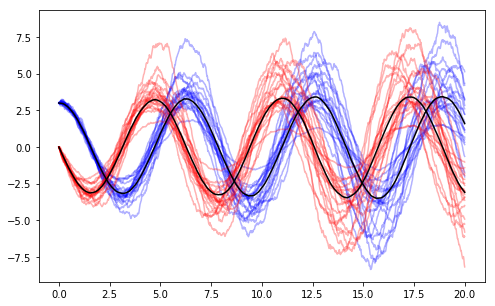

In [5]:
# test n-d Euler case


x02 = np.array([3, 0] )
tspan2 = np.linspace(0, 20, 1001)

A2 = lambda x : np.array([x[1], -x[0]])
B2 = lambda x:  np.array([[(x[0])/10, -(x[1])/10 ],
          [-(x[0])/10, (x[1])/10 ]])
Numtrajs2=100
xtrajs2=np.zeros((len(x02), len(tspan2), Numtrajs2))

start_time = timeit.default_timer()
for ind in range(Numtrajs2):
    xtrajs2[:, :, ind]=SdeInt().Euler(A2, B2, x02, tspan2)
elapsed_time = timeit.default_timer() - start_time
print("Elapsed time is {} seconds".format(elapsed_time))
fig_ii, ax_ii  = plt.subplots(figsize=(8,5))
ax_ii.plot(tspan2, xtrajs2[0,:, 0:20], '-b', alpha=0.3)
ax_ii.plot(tspan2, xtrajs2[1,:, 0:20], '-r', alpha=0.3)

ax_ii.plot(tspan2, np.mean(xtrajs2[0,:, :], axis=1), '-k')
ax_ii.plot(tspan2, np.mean(xtrajs2[1,:, :], axis=1), '-k')
''

In [6]:
SdeInt.Euler?

In [7]:
# test 1d semi-Euler case
# since diffusion vector is constant we are good
mu = 5
kappa = 2
d = 1

x0 = 1
sigma20 = 0 # initial variance
tspan = np.linspace(0, 10, 1001)

A = lambda x : kappa*( mu-x)
B = lambda x: np.sqrt(d)

Numtrajs=2000
xtrajs=np.zeros((len(tspan), Numtrajs))

start_time = timeit.default_timer()
for ind in range(Numtrajs):
    xtrajs[:, ind]=SdeInt().SemiEuler(A, B, x0, tspan)
elapsed_time = timeit.default_timer() - start_time
print("Elapsed time is {} seconds".format(elapsed_time))

# construct known solution  distribution
# for arbitrary linear 1d SDEs, just get xbar and sigma2
xbar = lambda t : mu+(x0-mu)*np.exp(-kappa*t)
sigma2 = lambda t : sigma20*np.exp(-2*kappa*t) + d*(1-np.exp(-2*kappa*t))/(2*kappa)
P = lambda x, t: np.exp(-(x-xbar(t))**2 / (2*sigma2(t)) )/np.sqrt(2*np.pi*sigma2(t))

Elapsed time is 27.38765291099844 seconds


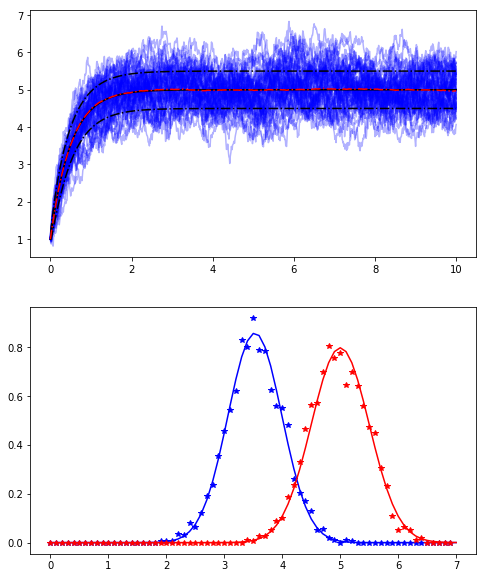

In [8]:
fig_i, ax_i  = plt.subplots(2, 1, figsize=(8,10))
ax_i[0].plot(tspan, xtrajs[:, 0:50], '-b', alpha=0.3)
ax_i[0].plot(tspan,xbar(tspan), '-k')
ax_i[0].plot(tspan[1:-1],xbar(tspan[1:-1])+np.sqrt(sigma2(tspan[1:-1])), '-.k')
ax_i[0].plot(tspan[1:-1],xbar(tspan[1:-1])-np.sqrt(sigma2(tspan[1:-1])), '-.k')
ax_i[0].plot(tspan, np.mean(xtrajs, axis=1), '-.r')

deltabin =0.1
xbinc=np.linspace(0, 7, int(7./deltabin+1))
indplot1 = -1
(Pstochr1, xbinr1) = np.histogram(xtrajs[indplot1,:], xbinc-deltabin/2)

indplot2 = 50
(Pstochr2, xbinr2) = np.histogram(xtrajs[indplot2,:], xbinc-deltabin/2)

ax_i[1].plot(xbinc, P(xbinc, tspan[indplot2]), 'b')
ax_i[1].plot(xbinc[0:-1], Pstochr2/Numtrajs/deltabin, '*b')


ax_i[1].plot(xbinc, P(xbinc, tspan[indplot1]), 'r')
ax_i[1].plot(xbinc[0:-1], Pstochr1/Numtrajs/deltabin, '*r')


Elapsed time is 4.115445754003304 seconds


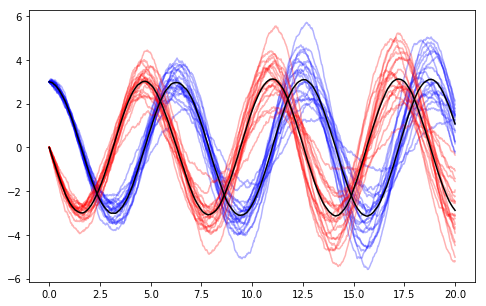

In [9]:
# test n-d Euler case


x02 = np.array([3, 0] )
tspan2 = np.linspace(0, 20, 1001)

A2 = lambda x : np.array([x[1], -x[0]])
B2 = lambda x:  np.array([[1/10, -2/10 ],
          [-2/10, 1/10 ]])
Numtrajs2=50
xtrajs2=np.zeros((len(x02), len(tspan2), Numtrajs2))

start_time = timeit.default_timer()
for ind in range(Numtrajs2):
    xtrajs2[:, :, ind]=SdeInt().SemiEuler(A2, B2, x02, tspan2)
elapsed_time = timeit.default_timer() - start_time
print("Elapsed time is {} seconds".format(elapsed_time))
fig_ii, ax_ii  = plt.subplots(figsize=(8,5))
ax_ii.plot(tspan2, xtrajs2[0,:, 0:20], '-b', alpha=0.3)
ax_ii.plot(tspan2, xtrajs2[1,:, 0:20], '-r', alpha=0.3)

ax_ii.plot(tspan2, np.mean(xtrajs2[0,:, :], axis=1), '-k')
ax_ii.plot(tspan2, np.mean(xtrajs2[1,:, :], axis=1), '-k')

In [10]:
SdeInt().Milstein(A2, B2, x02, tspan2, 0)

array([[ 3.        ,  3.06149083,  3.0658028 , ...,  1.87794122,
         1.87216874,  1.87311231],
       [ 0.        , -0.09354758, -0.14095124, ..., -1.50163898,
        -1.54423447, -1.61018334]])